In [2]:
import numpy as np
import gom_eval as ge
from lmfit import Model
import matplotlib.pyplot as plt

# First try to do a quick and dirty fit with the 3D data for 1.5 mm without rotating the datapoints


Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
a      0.0004131     -inf      inf 4.777e-07     True     None     None
alpha         0     -inf      inf        0    False     None     None
beta          0     -inf      inf        0    False     None     None
c         3.762     -inf      inf 0.002236     True     None     None
gamma         0     -inf      inf        0    False     None     None
y0        116.1     -inf      inf  0.04383     True     None     None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
A          4.25     -inf      inf     None     True     None     None
a          0.01     -inf      inf     None     True     None     None
alpha         0     -inf      inf     None     True     None     None
beta          0     -inf      inf     None     True     None     None
c             7     -inf      inf     None     True     None     None
gamma         0     -inf      inf     None     True     None     None
y0           7

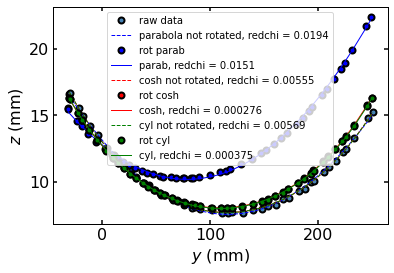

In [34]:

%matplotlib inline
map_1p5mm = np.genfromtxt('./data/1p5mm/Reference Points_1.5mm.npy')
#sort this by the y values to improve the visual quality of the fitting 
map_1p5mm = map_1p5mm[np.argsort(map_1p5mm[:, 1])]

xs, ys, zs = map_1p5mm[:, 0], map_1p5mm[:, 1], map_1p5mm[:, 2]

#Fitting and plotting all the different models
fig, ax = plt.subplots(1)
ax.plot(map_1p5mm[:, 1], map_1p5mm[:, 2], label='raw data', color='steelblue', marker='o', linestyle=' ')
#Fitting of parabola 
#without rotation
parab_mod = Model(ge.zero_res_parabolic)
parab_params = parab_mod.make_params()
parab_params.add('a', value=2.5e-4)
parab_params.add('y0', value=100)
parab_params.add('c', value=7)
parab_params.add('alpha', value=0, vary=False)
parab_params.add('beta', value=0, vary=False)
parab_params.add('gamma', value=0, vary=False)

parab_without_res = parab_mod.fit(xyz=map_1p5mm, data=np.zeros_like(map_1p5mm[:, 0]), params=parab_params)
parab_without_res.params.pretty_print()
parab_not_x, parab_not_y, parab_not_z, parab_nalc_z = ge.return_parab_val(map_1p5mm, **parab_without_res.values)

ax.plot(parab_not_y, parab_nalc_z, label='parabola not rotated, redchi = {:.3}'.format(parab_without_res.redchi), color='blue', linestyle='--', marker='')
#with rotation 
parab_params['alpha'].vary = True
parab_params['beta'].vary = True
parab_params['gamma'].vary = True


parab_with_res = parab_mod.fit(xyz=map_1p5mm, data=np.zeros_like(map_1p5mm[:, 0]), params=parab_params)

parab_rot_x, parab_rot_y, parab_rot_z, parab_calc_z = ge.return_parab_val(map_1p5mm, **parab_with_res.values)

ax.plot(parab_rot_y, parab_rot_z, marker='o', linestyle='', color='blue', label='rot parab')
ax.plot(parab_rot_y, parab_calc_z, marker=' ', color='blue', label='parab, redchi = {:.3}'.format(parab_with_res.redchi))

#Fitting of cosh 
#without rotation
cosh_mod = Model(ge.zero_res_cosh)
cosh_params = cosh_mod.make_params()
cosh_params.add('a', value=1/100, vary=True)#value was estimated from plot
cosh_params.add('A', value=4.25)
cosh_params.add('y0', value=78)
cosh_params.add('c', value=7)
cosh_params.add('alpha', value=0, vary=False)
cosh_params.add('beta',  value=0, vary=False)
cosh_params.add('gamma', value=0, vary=False)


cosh_without_res = cosh_mod.fit(xyz=map_1p5mm, data=np.zeros_like(map_1p5mm[:, 0]), params=cosh_params)
cosh_not_x, cosh_not_y, cosh_not_z, cosh_nalc_z = ge.return_cosh_val(map_1p5mm, **cosh_without_res.values)

ax.plot(cosh_not_y, cosh_nalc_z, label='cosh not rotated, redchi = {:.3}'.format(cosh_without_res.redchi), color='red', linestyle='--', marker='')
#with rotation 
cosh_params['alpha'].vary = True
cosh_params['beta'].vary = True
cosh_params['gamma'].vary = True
cosh_params.pretty_print()

cosh_with_res = cosh_mod.fit(xyz=map_1p5mm, data=np.zeros_like(map_1p5mm[:, 0]), params=cosh_params)
cosh_with_res.params.pretty_print()
cosh_rot_x, cosh_rot_y, cosh_rot_z, cosh_calc_z = ge.return_cosh_val(map_1p5mm, **cosh_with_res.values)

ax.plot(cosh_rot_y, cosh_rot_z, marker='o', linestyle='', color='red', label='rot cosh')
ax.plot(cosh_rot_y, cosh_calc_z, marker=' ', color='red', label='cosh, redchi = {:.3}'.format(cosh_with_res.redchi))


#Fitting of cylindric values
#without rotation
cyl_mod = Model(ge.zero_res_cyl)
cyl_params = cyl_mod.make_params()
cyl_params.add('b', value=50, vary=True)#value was estimated from plot
cyl_params.add('y0', value=78)
cyl_params.add('z0', value=30)
cyl_params.add('a', value=200)
cyl_params.add('alpha', value=0, vary=False)
cyl_params.add('beta',  value=0, vary=False)
cyl_params.add('gamma', value=0, vary=False)


cyl_without_res = cyl_mod.fit(xyz=map_1p5mm, data=np.zeros_like(map_1p5mm[:, 0]), params=cyl_params)
cyl_not_x, cyl_not_y, cyl_not_z, cyl_nalc_z = ge.return_cyl_val(map_1p5mm, **cyl_without_res.values)

ax.plot(cyl_not_y, cyl_nalc_z, label='cyl not rotated, redchi = {:.3}'.format(cyl_without_res.redchi), color='green', linestyle='--', marker='')
#with rotation 
cyl_params['alpha'].vary = True
cyl_params['beta'].vary = True
cyl_params['gamma'].vary = True
cyl_params.pretty_print()

cyl_with_res = cyl_mod.fit(xyz=map_1p5mm, data=np.zeros_like(map_1p5mm[:, 0]), params=cyl_params)
cyl_with_res.params.pretty_print()
cyl_rot_x, cyl_rot_y, cyl_rot_z, cyl_calc_z = ge.return_cyl_val(map_1p5mm, **cyl_with_res.values)

ax.plot(cyl_rot_y, cyl_rot_z, marker='o', linestyle='', color='green', label='rot cyl')
ax.plot(cyl_rot_y, cyl_calc_z, marker=' ', color='green', label='cyl, redchi = {:.3}'.format(cyl_with_res.redchi))

ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$z$ (mm)')
ax.legend()



In [37]:
%matplotlib auto
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.scatter3D(xs, ys, zs, color='steelblue')
ax.scatter3D(cyl_rot_x, cyl_rot_y, cyl_calc_z, color='green')
ax.scatter3D(cosh_rot_x, cosh_rot_y, cosh_calc_z, color='red')
ax.scatter3D(parab_rot_x, parab_rot_y, parab_calc_z, color='blue')

Using matplotlib backend: QtAgg


# 2.5 mm

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
a      8.384e-05     -inf      inf 1.743e-07     True     None     None
alpha         0     -inf      inf        0    False     None     None
beta          0     -inf      inf        0    False     None     None
c         8.064     -inf      inf 0.0008194     True     None     None
gamma         0     -inf      inf        0    False     None     None
y0        105.6     -inf      inf  0.07743     True     None     None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
A          4.25     -inf      inf     None     True     None     None
a          0.01     -inf      inf     None     True     None     None
alpha         0     -inf      inf     None     True     None     None
beta          0     -inf      inf     None     True     None     None
c             7     -inf      inf     None     True     None     None
gamma         0     -inf      inf     None     True     None     None
y0           

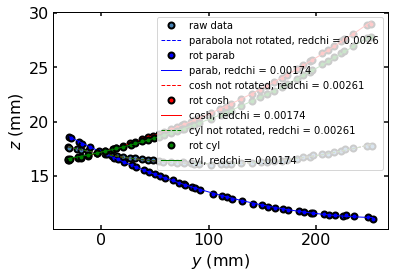

In [30]:

%matplotlib inline
map_2p5mm = np.genfromtxt('./data/2p5mm/Reference Points_2.5mm.npy')
#sort this by the y values to improve the visual quality of the fitting
map_2p5mm = map_2p5mm[np.argsort(map_2p5mm[:, 1])]
xs, ys, zs = map_2p5mm[:, 0], map_2p5mm[:, 1], map_2p5mm[:, 2]
#Fitting and plotting all the different models
fig, ax = plt.subplots(1)
ax.plot(map_2p5mm[:, 1], map_2p5mm[:, 2], label='raw data', color='steelblue', marker='o', linestyle=' ')
#Fitting of parabola 
#without rotation
parab_mod = Model(ge.zero_res_parabolic)
parab_params = parab_mod.make_params()
parab_params.add('a', value=2.5e-4)
parab_params.add('y0', value=100)
parab_params.add('c', value=7)
parab_params.add('alpha', value=0, vary=False)
parab_params.add('beta', value=0, vary=False)
parab_params.add('gamma', value=0, vary=False)

parab_without_res = parab_mod.fit(xyz=map_2p5mm, data=np.zeros_like(map_2p5mm[:, 0]), params=parab_params)
parab_without_res.params.pretty_print()
parab_not_x, parab_not_y, parab_not_z, parab_nalc_z = ge.return_parab_val(map_2p5mm, **parab_without_res.values)

ax.plot(parab_not_y, parab_nalc_z, label='parabola not rotated, redchi = {:.3}'.format(parab_without_res.redchi), color='blue', linestyle='--', marker='')
#with rotation 
parab_params['alpha'].vary = True
parab_params['beta'].vary = True
parab_params['gamma'].vary = True


parab_with_res = parab_mod.fit(xyz=map_2p5mm, data=np.zeros_like(map_2p5mm[:, 0]), params=parab_params)

parab_rot_x, parab_rot_y, parab_rot_z, parab_calc_z = ge.return_parab_val(map_2p5mm, **parab_with_res.values)

ax.plot(parab_rot_y, parab_rot_z, marker='o', linestyle='', color='blue', label='rot parab')
ax.plot(parab_rot_y, parab_calc_z, marker=' ', color='blue', label='parab, redchi = {:.3}'.format(parab_with_res.redchi))

#Fitting of cosh 
#without rotation
cosh_mod = Model(ge.zero_res_cosh)
cosh_params = cosh_mod.make_params()
cosh_params.add('a', value=1/100, vary=True)#value was estimated from plot
cosh_params.add('A', value=4.25)
cosh_params.add('y0', value=78)
cosh_params.add('c', value=7)
cosh_params.add('alpha', value=0, vary=False)
cosh_params.add('beta',  value=0, vary=False)
cosh_params.add('gamma', value=0, vary=False)


cosh_without_res = cosh_mod.fit(xyz=map_2p5mm, data=np.zeros_like(map_2p5mm[:, 0]), params=cosh_params)
cosh_not_x, cosh_not_y, cosh_not_z, cosh_nalc_z = ge.return_cosh_val(map_2p5mm, **cosh_without_res.values)

ax.plot(cosh_not_y, cosh_nalc_z, label='cosh not rotated, redchi = {:.3}'.format(cosh_without_res.redchi), color='red', linestyle='--', marker='')
#with rotation 
cosh_params['alpha'].vary = True
cosh_params['beta'].vary = True
cosh_params['gamma'].vary = True
cosh_params.pretty_print()

cosh_with_res = cosh_mod.fit(xyz=map_2p5mm, data=np.zeros_like(map_2p5mm[:, 0]), params=cosh_params)
cosh_with_res.params.pretty_print()
cosh_rot_x, cosh_rot_y, cosh_rot_z, cosh_calc_z = ge.return_cosh_val(map_2p5mm, **cosh_with_res.values)

ax.plot(cosh_rot_y, cosh_rot_z, marker='o', linestyle='', color='red', label='rot cosh')
ax.plot(cosh_rot_y, cosh_calc_z, marker=' ', color='red', label='cosh, redchi = {:.3}'.format(cosh_with_res.redchi))


#Fitting of cylindric values
#without rotation
cyl_mod = Model(ge.zero_res_cyl)
cyl_params = cyl_mod.make_params()
cyl_params.add('b', value=50, vary=True)#value was estimated from plot
cyl_params.add('y0', value=78)
cyl_params.add('z0', value=30)
cyl_params.add('a', value=200)
cyl_params.add('alpha', value=0, vary=False)
cyl_params.add('beta',  value=0, vary=False)
cyl_params.add('gamma', value=0, vary=False)


cyl_without_res = cyl_mod.fit(xyz=map_2p5mm, data=np.zeros_like(map_2p5mm[:, 0]), params=cyl_params)
cyl_not_x, cyl_not_y, cyl_not_z, cyl_nalc_z = ge.return_cyl_val(map_2p5mm, **cyl_without_res.values)

ax.plot(cyl_not_y, cyl_nalc_z, label='cyl not rotated, redchi = {:.3}'.format(cyl_without_res.redchi), color='green', linestyle='--', marker='')
#with rotation 
cyl_params['alpha'].vary = True
cyl_params['beta'].vary = True
cyl_params['gamma'].vary = True
cyl_params.pretty_print()

cyl_with_res = cyl_mod.fit(xyz=map_2p5mm, data=np.zeros_like(map_2p5mm[:, 0]), params=cyl_params)
cyl_with_res.params.pretty_print()
cyl_rot_x, cyl_rot_y, cyl_rot_z, cyl_calc_z = ge.return_cyl_val(map_2p5mm, **cyl_with_res.values)

ax.plot(cyl_rot_y, cyl_rot_z, marker='o', linestyle='', color='green', label='rot cyl')
ax.plot(cyl_rot_y, cyl_calc_z, marker=' ', color='green', label='cyl, redchi = {:.3}'.format(cyl_with_res.redchi))

ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$z$ (mm)')
ax.legend()


In [31]:
%matplotlib auto
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.scatter3D(xs, ys, zs, color='steelblue')
ax.scatter3D(cyl_rot_x, cyl_rot_y, cyl_calc_z, color='green')
ax.scatter3D(cosh_rot_x, cosh_rot_y, cosh_calc_z, color='red')
ax.scatter3D(parab_rot_x, parab_rot_y, parab_calc_z, color='blue')

Using matplotlib backend: QtAgg


2.0 mm

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
a      0.0002506     -inf      inf 1.242e-07     True     None     None
alpha         0     -inf      inf        0    False     None     None
beta          0     -inf      inf        0    False     None     None
c         5.959     -inf      inf 0.000572     True     None     None
gamma         0     -inf      inf        0    False     None     None
y0        111.8     -inf      inf  0.01893     True     None     None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
A          4.25     -inf      inf     None     True     None     None
a          0.01     -inf      inf     None     True     None     None
alpha         0     -inf      inf     None     True     None     None
beta          0     -inf      inf     None     True     None     None
c             7     -inf      inf     None     True     None     None
gamma         0     -inf      inf     None     True     None     None
y0           7

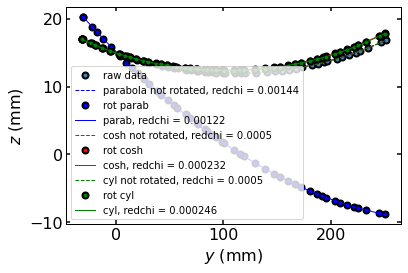

In [32]:

%matplotlib inline
map_2p0mm = np.genfromtxt('./data/2p0mm/Reference Points_2.0mm.npy')
#sort this by the y values to improve the visual quality of the fitting 
map_2p0mm = map_2p0mm[np.argsort(map_2p0mm[:, 1])]
xs, ys, zs = map_2p0mm[:, 0], map_2p0mm[:, 1], map_2p0mm[:, 2]
ax.scatter3D(xs, ys, zs)
#Fitting and plotting all the different models
fig, ax = plt.subplots(1)
ax.plot(map_2p0mm[:, 1], map_2p0mm[:, 2], label='raw data', color='steelblue', marker='o', linestyle=' ')
#Fitting of parabola 
#without rotation
parab_mod = Model(ge.zero_res_parabolic)
parab_params = parab_mod.make_params()
parab_params.add('a', value=2.5e-4)
parab_params.add('y0', value=100)
parab_params.add('c', value=7)
parab_params.add('alpha', value=0, vary=False)
parab_params.add('beta', value=0, vary=False)
parab_params.add('gamma', value=0, vary=False)

parab_without_res = parab_mod.fit(xyz=map_2p0mm, data=np.zeros_like(map_2p0mm[:, 0]), params=parab_params)
parab_without_res.params.pretty_print()
parab_not_x, parab_not_y, parab_not_z, parab_nalc_z = ge.return_parab_val(map_2p0mm, **parab_without_res.values)

ax.plot(parab_not_y, parab_nalc_z, label='parabola not rotated, redchi = {:.3}'.format(parab_without_res.redchi), color='blue', linestyle='--', marker='')
#with rotation 
parab_params['alpha'].vary = True
parab_params['beta'].vary = True
parab_params['gamma'].vary = True


parab_with_res = parab_mod.fit(xyz=map_2p0mm, data=np.zeros_like(map_2p0mm[:, 0]), params=parab_params)

parab_rot_x, parab_rot_y, parab_rot_z, parab_calc_z = ge.return_parab_val(map_2p0mm, **parab_with_res.values)

ax.plot(parab_rot_y, parab_rot_z, marker='o', linestyle='', color='blue', label='rot parab')
ax.plot(parab_rot_y, parab_calc_z, marker=' ', color='blue', label='parab, redchi = {:.3}'.format(parab_with_res.redchi))

#Fitting of cosh 
#without rotation
cosh_mod = Model(ge.zero_res_cosh)
cosh_params = cosh_mod.make_params()
cosh_params.add('a', value=1/100, vary=True)#value was estimated from plot
cosh_params.add('A', value=4.25)
cosh_params.add('y0', value=78)
cosh_params.add('c', value=7)
cosh_params.add('alpha', value=0, vary=False)
cosh_params.add('beta',  value=0, vary=False)
cosh_params.add('gamma', value=0, vary=False)


cosh_without_res = cosh_mod.fit(xyz=map_2p0mm, data=np.zeros_like(map_2p0mm[:, 0]), params=cosh_params)
cosh_not_x, cosh_not_y, cosh_not_z, cosh_nalc_z = ge.return_cosh_val(map_2p0mm, **cosh_without_res.values)

ax.plot(cosh_not_y, cosh_nalc_z, label='cosh not rotated, redchi = {:.3}'.format(cosh_without_res.redchi), color='red', linestyle='--', marker='')
#with rotation 
cosh_params['alpha'].vary = True
cosh_params['beta'].vary = True
cosh_params['gamma'].vary = True
cosh_params.pretty_print()

cosh_with_res = cosh_mod.fit(xyz=map_2p0mm, data=np.zeros_like(map_2p0mm[:, 0]), params=cosh_params)
cosh_with_res.params.pretty_print()
cosh_rot_x, cosh_rot_y, cosh_rot_z, cosh_calc_z = ge.return_cosh_val(map_2p0mm, **cosh_with_res.values)

ax.plot(cosh_rot_y, cosh_rot_z, marker='o', linestyle='', color='red', label='rot cosh')
ax.plot(cosh_rot_y, cosh_calc_z, marker=' ', color='red', label='cosh, redchi = {:.3}'.format(cosh_with_res.redchi))


#Fitting of cylindric values
#without rotation
cyl_mod = Model(ge.zero_res_cyl)
cyl_params = cyl_mod.make_params()
cyl_params.add('b', value=50, vary=True)#value was estimated from plot
cyl_params.add('y0', value=78)
cyl_params.add('z0', value=30)
cyl_params.add('a', value=200)
cyl_params.add('alpha', value=0, vary=False)
cyl_params.add('beta',  value=0, vary=False)
cyl_params.add('gamma', value=0, vary=False)


cyl_without_res = cyl_mod.fit(xyz=map_2p0mm, data=np.zeros_like(map_2p0mm[:, 0]), params=cyl_params)
cyl_not_x, cyl_not_y, cyl_not_z, cyl_nalc_z = ge.return_cyl_val(map_2p0mm, **cyl_without_res.values)

ax.plot(cyl_not_y, cyl_nalc_z, label='cyl not rotated, redchi = {:.3}'.format(cyl_without_res.redchi), color='green', linestyle='--', marker='')
#with rotation 
cyl_params['alpha'].vary = True
cyl_params['beta'].vary = True
cyl_params['gamma'].vary = True
cyl_params.pretty_print()

cyl_with_res = cyl_mod.fit(xyz=map_2p0mm, data=np.zeros_like(map_2p0mm[:, 0]), params=cyl_params)
cyl_with_res.params.pretty_print()
cyl_rot_x, cyl_rot_y, cyl_rot_z, cyl_calc_z = ge.return_cyl_val(map_2p0mm, **cyl_with_res.values)

ax.plot(cyl_rot_y, cyl_rot_z, marker='o', linestyle='', color='green', label='rot cyl')
ax.plot(cyl_rot_y, cyl_calc_z, marker=' ', color='green', label='cyl, redchi = {:.3}'.format(cyl_with_res.redchi))

ax.set_xlabel('$y$ (mm)')
ax.set_ylabel('$z$ (mm)')
ax.legend()


In [33]:
%matplotlib auto
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.scatter3D(xs, ys, zs, color='steelblue')
ax.scatter3D(cyl_rot_x, cyl_rot_y, cyl_calc_z, color='green')
ax.scatter3D(cosh_rot_x, cosh_rot_y, cosh_calc_z, color='red')
ax.scatter3D(parab_rot_x, parab_rot_y, parab_calc_z, color='blue')

Using matplotlib backend: QtAgg


# @ Markos you dont need this 

data is almost invariant along x, so lets make our model

# Parabolic model without rotation

In [25]:
from numpy import sin, cos
def parabolic_fit(y, a, y0, c):
    """for a given x and y (x is ignored here), returns the elevation z = a*(y-y0)**2+c

    Args:
        x (float): coordinate along which the shape is translationally invariant
        y (float): coordinate on which the elevation depends
        a (float): prefactor of the parabola
        y0 (float): center of the parabola in y
        c (float): offset of the parabola
    """
    return c+ a*(y-y0)**2+c

def rotation_euler(x, y, z, alpha, beta, gamma):
    mat = np.array([
        [cos(beta)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma)-cos(alpha)*sin(gamma), cos(alpha)*sin(beta)*cos(gamma)+sin(alpha)*sin(gamma)],
        [cos(beta)*sin(gamma), sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma)],
        [-sin(beta), sin(alpha)*cos(beta), cos(alpha)*cos(beta)]
    ])#matrix of rotation as copied from wikipedia
    vec = np.array([
        [x],
        [y],
        [z]
    ])
    print(mat.shape, vec.shape)
    return mat @ vec

def zero_res(xyz, a, y0, c, alpha, beta, gamma):
    x, y, z = xyz
    vec_rot = rotation_euler(x, y, z, alpha, beta, gamma)
    rot_x = vec_rot[0]
    rot_y = vec_rot[1]
    rot_z = vec_rot[2]
    calc_z = parabolic_fit(rot_z, a, y0, c)
    return calc_z-rot_z

mod = Model(parabolic_fit)
params = mod.make_params()
params.add('a', value=2.5e-4, vary=True)#value was estimated from plot
params.add('y0', value=100)
params.add('c', value=7)
params.add('alpha', value=0, vary=False)
params.add('beta', value=0, vary=False)
params.add('gamma', value=0, vary=False)


res_without_rot = mod.fit(y=ys, data=zs, params=params)
res_without_rot.params.pretty_print()
fig, ax = plt.subplots()
ax.plot(ys, zs, marker='o', linestyle=' ')
ax.plot(ys, res_without_rot.eval(y=ys, params=res_without_rot.params), linestyle='-', marker='')

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
a      0.0004131     -inf      inf 3.382e-06     True     None     None
alpha         0     -inf      inf        0    False     None     None
beta          0     -inf      inf        0    False     None     None
c         3.762     -inf      inf  0.01583     True     None     None
gamma         0     -inf      inf        0    False     None     None
y0        116.1     -inf      inf   0.3103     True     None     None


In [2]:
from numpy import sin, cos, cosh

def rotate_array(xyz, alpha, beta, gamma):
    rot_x = []
    rot_y = []
    rot_z = []
    for ind, val in enumerate(xyz):
        x, y, z = val
        rot_vec = rotation_euler(x, y, z, alpha, beta, gamma)
        rot_x.append(rot_vec[0])
        rot_y.append(rot_vec[1])
        rot_z.append(rot_vec[2])
    
    return np.array(rot_x), np.array(rot_y), np.array(rot_z)

def cylindric_fit(y, y0, b, a, z0):
    return -b*(1-(y-y0)**2/a**2)**0.5+z0

def parabolic_fit(y, a, y0, c):
    """for a given x and y (x is ignored here), returns the elevation z = a*(y-y0)**2+c

    Args:
        x (float): coordinate along which the shape is translationally invariant
        y (float): coordinate on which the elevation depends
        a (float): prefactor of the parabola
        y0 (float): center of the parabola in y
        c (float): offset of the parabola
    """
    return c+ a*(y-y0)**2+c

def cosh_fit(y, a, A, y0, c, alpha=0, beta=0, gamma=0):
    """returns the cosh_fit

    Args:
        y (_type_): _description_
        a (_type_): _description_
        A (_type_): _description_
        y0 (_type_): _description_
        c (_type_): _description_
        alpha (int, optional): _description_. Defaults to 0.
        beta (int, optional): _description_. Defaults to 0.
        gamma (int, optional): _description_. Defaults to 0.

    Returns:
        _type_: _description_
    """
    return A*(cosh(a*(y-y0))-1)+c

def rotation_euler(x, y, z, alpha, beta, gamma):
    mat = np.array([
        [cos(beta)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma)-cos(alpha)*sin(gamma), cos(alpha)*sin(beta)*cos(gamma)+sin(alpha)*sin(gamma)],
        [cos(beta)*sin(gamma), sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma)],
        [-sin(beta), sin(alpha)*cos(beta), cos(alpha)*cos(beta)]
    ])#matrix of rotation as copied from wikipedia
    vec = np.array([
        [x],
        [y],
        [z]
    ])
    return mat @ vec

def zero_res_parabolic(xyz, a, y0, c, alpha, beta, gamma):
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    rot_x = []
    rot_y = []
    rot_z = []
    for ind, val  in enumerate(x):
        vec_rot =rotation_euler(x[ind], y[ind], z[ind], alpha, beta, gamma)
        rot_x.append(vec_rot[0])
        rot_y.append(vec_rot[1])
        rot_z.append(vec_rot[2])
    rot_y = np.asarray(rot_y)
    rot_z = np.asarray(rot_z)
    calc_z = parabolic_fit(rot_y, a, y0, c)
    return calc_z-rot_z

def zero_res_cosh(xyz, a, A, y0, c, alpha, beta, gamma):
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    rot_x = []
    rot_y = []
    rot_z = []
    for ind, val  in enumerate(x):
        vec_rot =rotation_euler(x[ind], y[ind], z[ind], alpha, beta, gamma)
        rot_x.append(vec_rot[0])
        rot_y.append(vec_rot[1])
        rot_z.append(vec_rot[2])
    rot_y = np.asarray(rot_y)
    rot_z = np.asarray(rot_z)
    calc_z = cosh_fit(rot_y, a, A, y0, c)
    return calc_z-rot_z

def zero_res_cyl(xyz, y0, b, a, r, z0, alpha, beta, gamma):
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    rot_x = []
    rot_y = []
    rot_z = []
    for ind, val  in enumerate(x):
        vec_rot =rotation_euler(x[ind], y[ind], z[ind], alpha, beta, gamma)
        rot_x.append(vec_rot[0])
        rot_y.append(vec_rot[1])
        rot_z.append(vec_rot[2])
    rot_y = np.asarray(rot_y)
    rot_z = np.asarray(rot_z)
    calc_z = cosh_fit(rot_y, y0, b, a, r, z0)
    return calc_z-rot_z
#---------------------------------- fitting without rotation -------------------------------------
#---------------------------------- fitting the cosh model ---------------------------------------
mod_cosh = Model(cosh_fit)
params = mod.make_params()
params.add('a', value=1/100, vary=True)#value was estimated from plot
params.add('A', value=4.25)
params.add('y0', value=78)
params.add('c', value=7)
params.add('alpha', value=0, vary=False)
params.add('beta',  value=0, vary=False)
params.add('gamma', value=0, vary=False)


res_cosh = mod_cosh.fit(y=ys, data=zs, params=params)
res_cosh.params.pretty_print()


#------------------------------- rotating data and fitting -----------------
# ------------------------------------ fitting the parabolic model -----------------------------------
mod = Model(zero_res_parabolic)
params = mod.make_params()
params.add('a', value=2.5e-4, vary=True)#value was estimated from plot
params.add('y0', value=100)
params.add('c', value=7)
params.add('alpha', value=0, vary=True)
params.add('beta',  value=0, vary=True)
params.add('gamma', value=0, vary=True)

return_values = np.zeros_like(zs)
res = mod.fit(xyz=map_1p5mm, data=return_values, params=params)
res.params.pretty_print()

#---------------------------------- fitting the cosh model ------------------------


mod_cosh_with = Model(zero_res_cosh)
params_with = mod_cosh_with.make_params()
params_with.add('a', value=1/100, vary=True)#value was estimated from plot
params_with.add('A', value=4.25)
params_with.add('y0', value=78)
params_with.add('c', value=7)
params_with.add('alpha', value=0, vary=True)
params_with.add('beta',  value=0, vary=True)
params_with.add('gamma', value=0, vary=True)

res_cosh_with = mod_cosh_with.fit(xyz=map_1p5mm, data=return_values, params=params_with)
print('cosh with rotation')
res_cosh_with.params.pretty_print()

#--------------------------------- fitting the cylinder model ---------------------

mod_cyl_with = Model(zero_res_cyl)
params_with = mod_cosh_with.make_params()
params_with.add('b', value=40, vary=True)#value was estimated from plot
params_with.add('y0', value=78)
params_with.add('z0', value=30)
params_with.add('a', value=70)
params_with.add('alpha', value=0, vary=True)
params_with.add('beta',  value=0, vary=True)
params_with.add('gamma', value=0, vary=True)
#-------------------------------- plotting and evaluation of the results --------------------

a = res.params['a'].value
c = res.params['c'].value
y0 = res.params['y0'].value
alpha_res = res.params['alpha'].value
beta_res = res.params['beta'].value
gamma_res = res.params['gamma'].value
rotated_array = rotate_array(map_1p5mm, alpha_res, beta_res, gamma_res)
rot_x_par , rot_y_par, rot_z_par =  rotated_array

a_cosh = res_cosh_with.params['a'].value
c_cosh = res_cosh_with.params['c'].value
y0_cosh = res_cosh_with.params['y0'].value
alpha_res_cosh = res_cosh_with.params['alpha'].value
beta_res_cosh = res_cosh_with.params['beta'].value
gamma_res_cosh = res_cosh_with.params['gamma'].value
rotated_array = rotate_array(map_1p5mm, alpha_res_cosh, beta_res_cosh, gamma_res_cosh)
rot_x_cosh , rot_y_cosh, rot_z_cosh =  rotated_array

# plot the data of the fits
grid_steps = 21
x_grid = np.linspace(np.min(rot_x_par), np.max(rot_x_par), grid_steps)
y_grid = np.linspace(np.min(rot_y_par), np.max(rot_y_par), grid_steps)
XX, YY = np.meshgrid(x_grid, y_grid)
ZZ = parabolic_fit(YY, a, y0, c)


fig = plt.figure()
ax = plt.subplot(projection='3d')
#ax.plot(ys, zs, marker='o', linestyle=' ')
ax.scatter3D(rot_x_par, rot_y_par, rot_z_par, color='red')
ax.scatter(XX, YY, ZZ, color='blue')


#make a 2d projection of the plot to see if the rotation was really worth it 
fig, ax = plt.subplots(1)
#without rotation 
ax.plot(ys, zs, marker='o', linestyle=' ', label='without rotation', color='steelblue')
ax.plot(ys, res_without_rot.eval(y=ys, params=res_without_rot.params), color='red', linestyle='--',\
    label='parabola, red_chi = {:.3}'.format(res_without_rot.redchi), marker=' ')
ax.plot(ys, res_cosh.best_fit, marker=' ', linestyle='--', label='cosh, red_chi = {:.3}'.format(res_cosh.redchi), color='blue')
#plotting parabola 
#with rotation 
ax.plot(rot_y_par, rot_z_par, marker='o', linestyle=' ', label='with rotation parabola', color='red')
ax.plot(rot_y_par, parabolic_fit(rot_y_par, a, y0, c), marker=' ', linestyle='-', color='red', label='parabola, red_chi = {:.3}'.format(res.redchi))

#plotting cosh 
#withrotation
ax.plot(rot_y_cosh, rot_z_cosh, marker='o', linestyle=' ', label='with rotation cosh', color='blue')
ax.plot(rot_y_cosh, cosh_fit(y=rot_y_cosh, **res_cosh_with.values), marker=' ', linestyle='-', color='blue',\
    label='cosh, red_chi = {:.3}'.format(res_cosh_with.redchi))



ax.legend()

NameError: name 'Model' is not defined

In [78]:
10/cosh(1.5)

4.2509603494228045

In [82]:
res_cosh_with.values

{'a': 0.010060676927332353,
 'A': 6.993522899484116,
 'y0': 115.68988485618605,
 'c': 7.664925276446207,
 'alpha': 0,
 'beta': 0,
 'gamma': 0}